<a href="https://colab.research.google.com/github/PrachiJadhav12/KNN-Classifier-mini_project/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Campus X/Data/Social_Network_Ads.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
#converting into numpy array
X = data.iloc[:,2:4].values

In [10]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
X.shape

(400, 2)

In [12]:
#output variable
y= data.iloc[:,-1].values

In [13]:
y.shape

(400,)

In [14]:
#Second part
#divide data for cross validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

In [15]:
X_train.shape

(320, 2)

In [16]:
X_test.shape

(80, 2)

In [24]:
#we have to make scaling to standard.
#Scale down Estimated salary to standard value
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.81008278, -1.45533149],
       [ 1.47138811,  0.04837284],
       [-0.12246918,  0.04837284],
       [-0.96627598,  0.60857642],
       [ 0.06504344, -0.77719032],
       [-1.1537886 , -1.57326908],
       [-0.77876336,  0.60857642],
       [ 0.34631237,  0.19579483],
       [ 0.72133762, -1.33739389],
       [ 0.81509393,  2.23021834],
       [-0.77876336,  1.13929559],
       [-1.06003229, -1.42584709],
       [ 0.15879975, -0.24647114],
       [-0.21622549, -0.48234633],
       [-1.52881385, -1.2194563 ],
       [-1.52881385, -0.15801795],
       [-0.77876336,  1.40465518],
       [-0.49749443, -0.74770592],
       [ 1.47138811, -1.2489407 ],
       [-1.34130122, -0.30543994],
       [-1.71632647,  0.16631044],
       [ 0.25255606, -0.48234633],
       [ 0.72133762,  0.40218562],
       [ 1.37763179, -1.01306551],
       [-0.3099818 , -0.24647114],
       [ 0.25255606,  0.34321683],
       [-0.12246918,  2.02382755],
       [ 0.90885024,  0.63806081],
       [ 0.62758131,

In [27]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.21207244, -0.59555784],
       [ 0.21207244, -0.09619985],
       [-0.00543775, -1.53552582],
       [-1.85427438,  0.31503614],
       [ 0.21207244,  2.01872812],
       [ 0.10331734,  1.25500413],
       [-0.00543775, -1.47677782],
       [ 0.32082753,  0.13879215],
       [-0.33170304,  0.72627214],
       [-0.87547852,  0.37378414],
       [ 0.21207244, -0.38993984],
       [ 0.21207244,  2.07747611],
       [-0.98423362, -0.68367984],
       [-1.20174381,  0.40315814],
       [-0.33170304, -1.68239582],
       [-0.44045814, -0.50743584],
       [ 0.42958263, -0.41931384],
       [ 0.42958263, -0.12557385],
       [ 0.32082753, -0.47806184],
       [ 1.51713358, -0.30181784],
       [ 1.0821132 ,  0.10941815],
       [ 1.0821132 ,  1.63686612],
       [-0.54921323,  1.75436212],
       [-0.76672342,  0.25628815],
       [ 0.75584791,  0.13879215],
       [ 1.29962339,  0.93189013],
       [-0.44045814, -0.12557385],
       [-0.00543775,  0.10941815],
       [ 1.40837849,

In [31]:
#apply KNN on data
#two methods to calculate value of K
#first method:calculate value of K by square root of training data

np.sqrt(X_train.shape[0])

17.88854381999832

In [33]:
K = 17


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=K)

In [35]:
#train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [36]:
y_pred=knn.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
y_pred.shape

(80,)

In [39]:
y_test.shape

(80,)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  4],
       [ 3, 24]])

In [43]:
 #2nd method to find K
 accuracy= []
 
 for i in range(1,26):
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(X_train,y_train)
   accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [44]:
accuracy

[0.9125,
 0.925,
 0.9375,
 0.95,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

In [45]:
#length of function
len(accuracy)

25

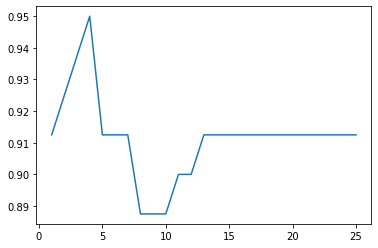

In [46]:
#to check on which area there is highest percentage
plt.plot(range(1,26),accuracy)

In [59]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [60]:
y_pred=knn.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.9125

In [63]:
#to create function to show output to create new input
def predict_output():
  age=int(input("enter the age"))
  salary=int(input("Enter the salary"))

  return np.array([[age],[salary]]) #2d array
                                    #for any input, 2D matrix should be there.
                                    

In [64]:
predict_output()

enter the age20
Enter the salary40000


array([[   20],
       [40000]])

In [77]:
#our input has one one column
#reshape with more columns
def predict_output():
  age=int(input("enter the age"))
  salary=int(input("Enter the salary"))

  X_new= np.array([[age],[salary]]).reshape(1,2)
  X_new= scaler.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "will not purchase"
  else:
    return "will purchase"


In [79]:
predict_output()

enter the age20
Enter the salary70000


'will not purchase'